# Review Notebook for Team Member 4

I am going to analyse the whole pipeline in this notebook, which includes downloading data, extracting answer sequences and visualizing patterns.

First, we will import the required modules

In [2]:
import data_extraction_M1 as M1
import data_preparation_M2 as M2
import data_analysis_M3 as M3

We will download and Collate Answer Files

In [3]:
cloud_urls= [
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/Edp4Leus4bhInnTwC61pAGABl7kYZ46ooAW39kkvdGgMoQ?e=ecyH52&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EQfilZ0BXNVPvx99hbEIm6YBUAymqr5szFQ5fAHRjualDw?e=TqXtEM&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/ETyN9xDQFLdAtndNs80-U20BH_QTPc4EgPt0SQAhcnTD7Q?e=nXbHFn&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EbHSu2RTX9dPiymdtvyr4rgBzTs2uZsJf5Juz--tFleBSw?e=xrTtSK&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EXKBUfseNtlGo2j4CYNmQwsBOFz3JIMda-IZlDi7KqsnAQ?e=Az4sEJ&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/ES6mqA3ggytNr5CzwTG_0GcB3oSxL4KtgoIGr3INmxXDfQ?e=T8FjWB&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/ETz6soThU_dAtrHyuW2BQm8BkynCfFppRcvLALxVfbcp2w?e=sVMFsM&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EX4qZhhAqQ1ErybuD4gORRgB4mir_hwXrzkWK1IBxUDkww?e=qU4dOt&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EaItX88bKRtNho9_tLBOko4BiQuEMJukOTwqQLX7Wwj0QQ?e=vLbVrW&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EWBsptEnoRFNnbaJ1evPxMkBBAKfXzyPOHk0_A07-kk5FQ?e=1bKdui&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EdrY1wlxrGxEiaW2vctDj0oB-PSjMz0NsCnE3LUYozPTpA?e=fxloPJ&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EUAvgSyPvXFCijmjKMz5S0wB-vsabPiydLe6LGspxqynsw?e=hhrF3F&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/Eao4E6xpQBtIl5ZHFGaBoxgBd_2z8g919_EYPuRL2s_DNA?e=kOzKac&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EWTFBGLZdsRAlDmDTBLSzPQBa6DcR6YB3l41LkmEOJtVLA?e=BXcgnb&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EYz0ZnWS1qtLq04qmGQfmHQBdkTTfbDP-RjKPM25Vb18CQ?e=cAFdBP&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EWQRWwZ8ocZGs_a3eMG6fDYBG86IGqg7-rOfq9Tm0f93yg?e=GTwfNN&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EU5jqGOxHZ1HscYQYNTpaVIBo2bT2tY1n9oPfqr-egORLw?e=khJaWE&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/Ec5nKZ9HhH9Nks9nTG3JGi0B1PsrVPY5hyWcMl5_IotyNQ?e=ZZEGTX&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EQI3gdYuJspGstL2pz-vWikBMJKuvcvvEHAFoFYNxLZvhw?e=aMuZ19&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EZSjnmbms5tEubV67qdRM3kBeqi0jLOwbyXe7W4e0mRv9g?e=C1B6FJ&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EaxJzBbUGdRMpIMRjtWN4fMBOcByee07UTNYATKQFAl_3g?e=lJD9g2&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EQ1TbbnDf_FCjRrIj1keFg4B-1Y--sMIwSa_iF16fCIEbA?e=Y0p98J&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EXWEkv4VJaVEppOcR79CDB0BSS8rsXW0C31LoiOmxjJwIg?e=g4kMJx&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/EUgyOR_vxuBNkDtID7hN-UUBmrAgZwy3Jn3467emksv1YA?e=4iNXSe&download=1",
        "https://leeds365-my.sharepoint.com/:t:/g/personal/mbhs1277_leeds_ac_uk/Eb597gekkztPisYO0EMAyDYBmQHvS1iLfX4RJ6x1zoUyQA?e=gnED6s&download=1"

        
    ]
data_folder = "Data"
output_folder = "Output"


M2.download_answer_files(cloud_urls, data_folder, respondent_index=25)  
M2.collate_answer_files(data_folder)


 Downloaded and saved answers_respondent_25.txt to Data
Collated file created at Output/collated_answers.txt


So we can see 25 files in our Data folder and a collated answers file in the Output folder. Which shows M2 performed well in downloading and collating text files.

And next, we will going to Extract Answer Sequences from Each Respondent.

In [4]:
for i in range(1, 26):  
    input_file = f"{data_folder}/answers_respondent_{i}.txt"
    answers = M1.extract_answers_sequence(input_file)
answers

[1,
 1,
 3,
 4,
 4,
 3,
 3,
 1,
 3,
 3,
 3,
 4,
 1,
 3,
 2,
 1,
 0,
 3,
 3,
 4,
 4,
 3,
 2,
 1,
 1,
 2,
 3,
 4,
 3,
 3,
 0,
 1,
 1,
 0,
 3,
 4,
 3,
 3,
 0,
 1,
 0,
 2,
 3,
 4,
 4,
 3,
 2,
 1,
 1,
 3,
 0,
 4,
 4,
 3,
 2,
 1,
 1,
 2,
 0,
 4,
 4,
 3,
 2,
 1,
 1,
 4,
 3,
 4,
 4,
 3,
 2,
 4,
 1,
 2,
 3,
 3,
 4,
 3,
 2,
 2,
 1,
 2,
 0,
 4,
 4,
 0,
 2,
 1,
 4,
 2,
 3,
 4,
 4,
 3,
 2,
 1,
 1,
 2,
 3,
 4]

The function output should be all numbers between 0 - 4, and from the output we could clearly see that the M1.extract_answers_sequence function works.

Now, we visualise the data and detect any pattern formed.

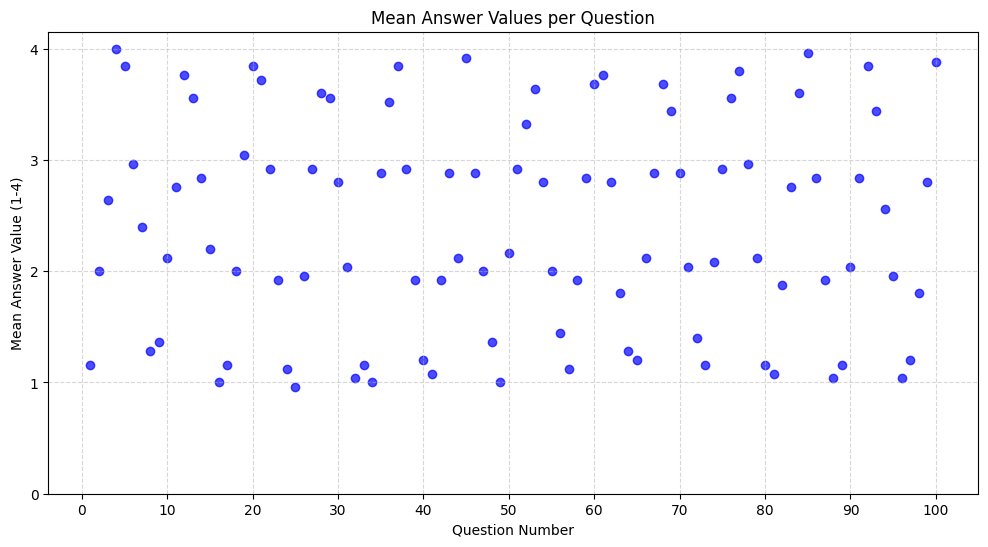

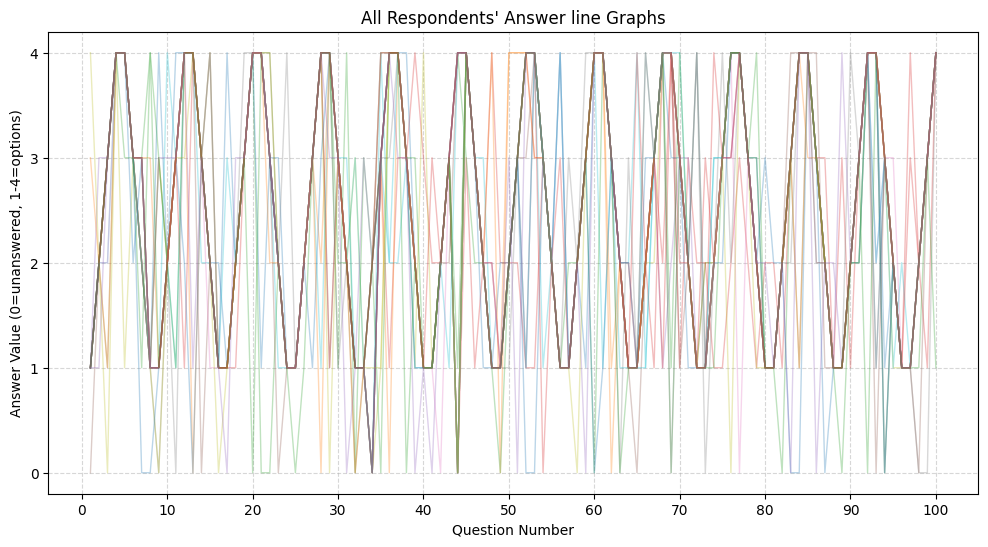

Invalid value for n. Use 1 (scatter) or 2 (line).


In [ ]:
collated_file = f"{output_folder}/collated_answers.txt"
means_sequence = M3.generate_means_sequence(collated_file)
M3.visualize_data(collated_file, n=1)
M3.visualize_data(collated_file, n=2)

# Test for error message
M3.visualize_data(collated_file, n=3) # This should print use n=1 or n=2

Two plots are produced, with n=1 and n=2.

In the scatter plot (plot type 1), we observe the mean selected answer per question across all respondents. This visualization allows us to estimate the most likely correct answer for each question.

In a well-designed multiple-choice quiz, the majority of students are likely to choose the correct answer if they know it. Therefore, the mean value per question will tend to be close to the correct answer.

Teamwork was well-coordinated, and each module performed its role within the pipeline. So we successfully executed a complete analysis pipeline.